## Graph Experiments  - **pytwanalysis** - (**TwitterAnalysis**)

##### Save results on the experiments spreasheet

#### Initialize packages

In [1]:
import pytwanalysis as ta
from pymongo import MongoClient
import time

#### Set your mongoDB connection

In [7]:
#db connection
mongoDBConnectionSTR = "mongodb://localhost:27017"
client = MongoClient(mongoDBConnectionSTR)
db = client.twitter_DB_Tst #choose your DB name here
db = client.myTwitterDB_MeToo_bkp_tst #choose your DB name here
db = client.twitter_DB_Austin_eom #choose your DB name here

#### Set up the folder path you want to save the ouput files

In [8]:
BASE_PATH = 'D:\\Data\\Experiments\\Austin2'

#### Initialize your TwitterAnalysis object

In [9]:
x = ta.TwitterAnalysis(BASE_PATH, db)

#### Create all edges for that db

In [38]:
x.export_mult_types_edges_for_input(type_of_graph = 'all')

** exporting edges - Graph type=user_conn_all
**   exporting edges for AllPeriods 2020-08-27 18:59:27
** exporting edges - END *** - 2020-08-27 19:00:33
** exporting edges - Graph type=user_conn_mention
**   exporting edges for AllPeriods 2020-08-27 19:00:33
** exporting edges - END *** - 2020-08-27 19:01:14
** exporting edges - Graph type=user_conn_retweet
**   exporting edges for AllPeriods 2020-08-27 19:01:14
** exporting edges - END *** - 2020-08-27 19:01:41
** exporting edges - Graph type=user_conn_reply
**   exporting edges for AllPeriods 2020-08-27 19:01:41
** exporting edges - END *** - 2020-08-27 19:01:44
** exporting edges - Graph type=user_conn_quote
**   exporting edges for AllPeriods 2020-08-27 19:01:44
** exporting edges - END *** - 2020-08-27 19:01:58
** exporting edges - Graph type=ht_conn
**   exporting edges for AllPeriods 2020-08-27 19:01:58
** exporting edges - END *** - 2020-08-27 19:02:16


#### Print EDA
###### Save the results on the spreasheet - (Tab "Graphs-EDA-Data")
###### Please also save the EDA.txt files. 

**** Tweet counts ******
                                
0  Total Original Tweets   68812
1          Total Replies   92469
2         Total Retweets  149320
3           Total Tweets  310601


**** Tweet counts by language ******
               
0  lang   count
1    en  310601


**** Tweet counts by month ******
                        
0  year  month_no  count
1  2020         9   1989
2  2020         5  50219
3  2020         6  59718
4  2020         8  54030
5  2020         4  59030
6  2020         7  61253
7  2020         3  24362


**** Tweet counts by file ******
                   
0  file_path  count


**** User counts ******
                                                                                     
0  1    tweet                      Users with at least one document in this db  96019
1  2  retweet    Users that were retweeted, but are not part of previous group  25044
2  3    quote      Users that were quoted, but are not part of previous groups   2885
3  4    reply  Us

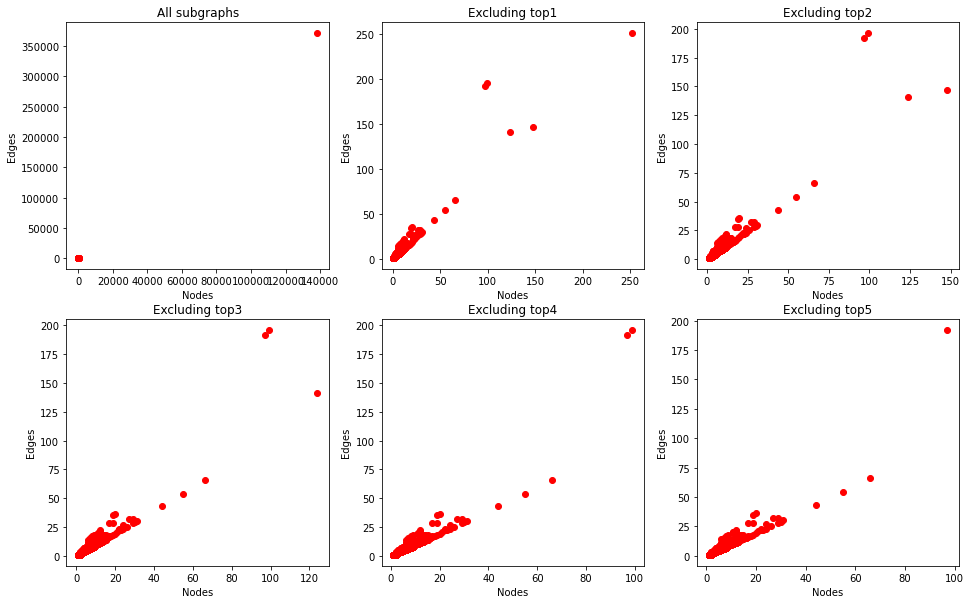

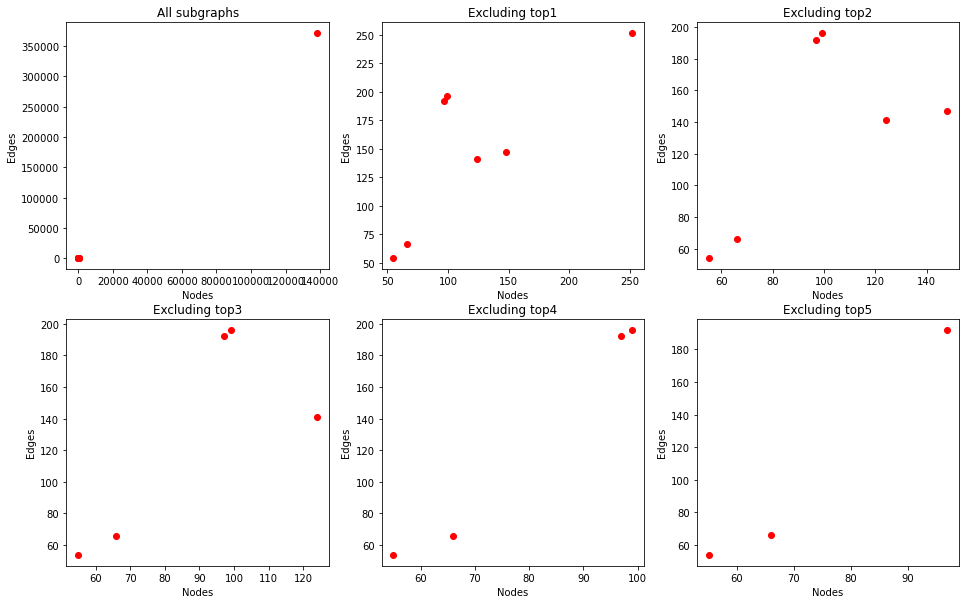

**** Calculating Community Distribution of the Largest Connected Component- (Louvain) ******


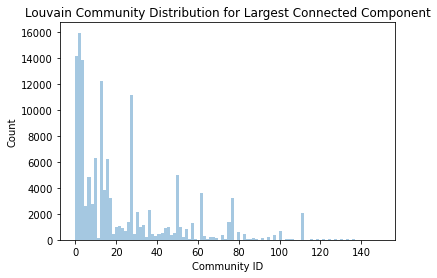

 # of Nodes 152935
 # of Edges 382197
 # of Nodes - (Largest Connected Component) 138299
 # of Edges - (Largest Connected Component) 367299
 # of Disconnected Graphs 5146
 # of Disconnected Graphs with 50 or more nodes 8
 # of Communities found in the largest connected component 150
 Degree of top 1 most connected user ['1', 'tweet', 'Users with at least one document in this db', '96019']
 Degree of top 2 most connected user ['2', 'retweet', 'Users that were retweeted, but are not part of previous group', '25044']
 Degree of top 3 most connected user ['3', 'quote', 'Users that were quoted, but are not part of previous groups', '2885']
 Degree of top 4 most connected user ['4', 'reply', 'Users that were replied to, but are not part of previous groups', '12120']
 Average Node Degree of largest connected graph 5.311665304882899
*** EDA - END *** - 2020-09-09 18:56:55


In [10]:
x.eda_analysis()

#### Community Metrics

##### Choose the graph type to analyze

In [ ]:
## TYPE OF GRAPH ANALYSIS
########################################################
# Type of graph analysis
# Options: user_conn_all,       --All user connections
#          user_conn_mention,   --Only Mentions user connections
#          user_conn_retweet,   --Only Retweets user connections
#          user_conn_reply,     --Only Replies user connections
#          user_conn_quote,     --Only Quotes user connections
#          ht_conn              --Hashtag connects - (Hashtgs that wereused together)

TYPE_OF_GRAPH = 'user_conn_all'
#------------------------------------------------------------

##### Load the graph

In [ ]:
edge_prefix_str = ''
case_ht_str = ''
if TYPE_OF_GRAPH == 'user_conn_all':
    edge_prefix_str = 'UserConnections_'                
elif TYPE_OF_GRAPH == 'user_conn_mention':
    edge_prefix_str = 'MentionUserConnections_'    
elif TYPE_OF_GRAPH == 'user_conn_retweet':
    edge_prefix_str = 'RetweetUserConnections_'    
elif TYPE_OF_GRAPH == 'user_conn_reply':
    edge_prefix_str = 'ReplyUserConnections_'    
elif TYPE_OF_GRAPH == 'user_conn_quote':
    edge_prefix_str = 'QuoteUserConnections_'    
elif TYPE_OF_GRAPH== 'ht_conn':
    edge_prefix_str = 'HTConnection_'
    case_ht_str = 'ht_'  
        
edge_file_path = BASE_PATH + '\\data_input_files\\' + edge_prefix_str + 'AllPeriods_' + case_ht_str + 'edges.txt'

G = x.loadGraphFromFile(edge_file_path)
G = x.largest_component_no_self_loops(G)

##### Calculate louvain_clustering

In [ ]:
print("Calculating...")
starttime = time.time()
G, labels, k = x.calculate_louvain_clustering(G)
endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

##### Calculate spectral_clustering

In [ ]:
print("Calculating...")
starttime = time.time()
G, labels, k = x.calculate_spectral_clustering(G, k=k)
endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

##### Print clustering metrics for community_louvain clustering method
###### Save the results on the spreasheet - (Tab "Graphs-CommtyData")

In [ ]:
x.print_commty_cluster_metrics(G, comm_att = 'community_louvain', ignore_cmmty_lt=100, acc_node_size_cutoff=30000)

##### Print clustering metrics for community_spectral clustering method
###### Save the results on the spreasheet - (Tab "Graphs-CommtyData")

In [ ]:
x.print_commty_cluster_metrics(G, comm_att = 'community_spectral', ignore_cmmty_lt=100, acc_node_size_cutoff=30000)

##### Print clustering metrics for the top 25 nodes clusters
###### Save the results on the spreasheet - (Tab "Graphs-CommtyData")

In [1]:
x.print_top_nodes_cluster_metrics(G, 25, acc_node_size_cutoff=30000)

NameError: name 'x' is not defined

##### Graph Reduction

In [ ]:
## TYPE OF GRAPH ANALYSIS
########################################################
# Type of graph analysis
# Options: user_conn_all,       --All user connections
#          user_conn_mention,   --Only Mentions user connections
#          user_conn_retweet,   --Only Retweets user connections
#          user_conn_reply,     --Only Replies user connections
#          user_conn_quote,     --Only Quotes user connections
#          ht_conn              --Hashtag connects - (Hashtgs that wereused together)

TYPE_OF_GRAPH = 'user_conn_all'
#------------------------------------------------------------

In [ ]:
edge_prefix_str = ''
case_ht_str = ''
if TYPE_OF_GRAPH == 'user_conn_all':
    edge_prefix_str = 'UserConnections_'                
elif TYPE_OF_GRAPH == 'user_conn_mention':
    edge_prefix_str = 'MentionUserConnections_'    
elif TYPE_OF_GRAPH == 'user_conn_retweet':
    edge_prefix_str = 'RetweetUserConnections_'    
elif TYPE_OF_GRAPH == 'user_conn_reply':
    edge_prefix_str = 'ReplyUserConnections_'    
elif TYPE_OF_GRAPH == 'user_conn_quote':
    edge_prefix_str = 'QuoteUserConnections_'    
elif TYPE_OF_GRAPH== 'ht_conn':
    edge_prefix_str = 'HTConnection_'
    case_ht_str = 'ht_'  
        
edge_file_path = BASE_PATH + '\\data_input_files\\' + edge_prefix_str + 'AllPeriods_' + case_ht_str + 'edges.txt'

G = x.loadGraphFromFile(edge_file_path)
G = x.largest_component_no_self_loops(G)

In [ ]:
# Set configurations
x.setConfigs(type_of_graph=TYPE_OF_GRAPH,
            period_arr=PERIOD_ARR,
            create_graphs_files_flag=CREATE_GRAPHS_FILES_FLAG, 
            top_ht_to_ignore=TOP_HT_TO_IGNORE,
            graph_plot_cutoff_no_nodes=GRAPH_PLOT_CUTOFF_NO_NODES, 
            graph_plot_cutoff_no_edges=GRAPH_PLOT_CUTOFF_NO_EDGES,
            create_graph_without_node_scale_flag=CREATE_GRAPH_WITHOUT_NODE_SCALE_FLAG, 
            create_graph_with_node_scale_flag=CREATE_GRAPH_WITH_NODE_SCALE_FLAG,
            create_reduced_graph_flag=CREATE_REDUCED_GRAPH_FLAG,
            reduced_graph_comty_contract_per=REDUCED_GRAPH_COMTY_PER,
            reduced_graph_remove_edge_weight=REDUCED_GRAPH_REMOVE_EDGE_WEIGHT,
            reduced_graph_remove_edges=REDUCED_GRAPH_REMOVE_EDGES_UNTIL_CUTOFF_FLAG,            
            commty_edge_size_cutoff=COMMTY_EDGE_SIZE_CUTOFF
            )

##### Insertion Experiments - (Tab DB-Performance)

In [1]:
import pytwanalysis as ta
from pymongo import MongoClient
import time

#db connection
mongoDBConnectionSTR = "mongodb://localhost:27017"
client = MongoClient(mongoDBConnectionSTR)
db = client.myTwitterDB_MeToo_perf_tst2 #choose your DB name here

BASE_PATH = 'D:\\Data\\Experiments\\metoo_perf_tsts2'
x = ta.TwitterAnalysis(BASE_PATH, db)

# This is the folder path where all of your twitter json files should be
JSON_FILES_PATH = 'D:\\Data\\MeToo\\original_files\\json_files'

In [2]:
print("Loading...")
starttime = time.time()

# Load json files into mongoDB
x.loadDocFromFile(JSON_FILES_PATH)

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

Loading...
loading process started...2020-09-01 10:24:27
loading process completed 2020-09-01 10:51:49
Execution Time:  1641.2442967891693 seconds 


In [3]:
# If you have a file with a list of user ids that are bots, 
# you ca set the path of that file here. If not, set this variable to None
bots_list_file = None

# You can set the number of tweets to load at a time. 
# (Large number may cause out of memory errors, low number may take a long time to run)
step = 100000

# Build collections
x.build_db_collections(step, bots_ids_list_file=bots_list_file)

loading process started (focusedTweet)... 2020-09-01 10:51:49
loading process completed (focusedTweet)... 2020-09-01 11:05:30
loading process started (users-tweet)... 2020-09-01 11:05:30
loading process completed (users)... 2020-09-01 11:14:29
loading process started (users-retweet)... 2020-09-01 11:14:29
loading process completed (users)... 2020-09-01 11:22:44
loading process started (users-quote)... 2020-09-01 11:22:44
loading process completed (users)... 2020-09-01 11:28:43
loading process started (users-reply)... 2020-09-01 11:28:43
loading process completed (users)... 2020-09-01 11:33:51
loading process started (users-mention)... 2020-09-01 11:33:51
loading process completed (users)... 2020-09-01 11:46:07
loading process started (tweetWords)... 2020-09-01 11:46:07
loading process completed (tweetWords)... 2020-09-01 13:48:44
loading process started (tweetConnections)... 2020-09-01 13:48:44
loading process completed (tweetConnections)... 2020-09-01 14:02:57
loading process started 

In [ ]:
print("Loading...")
starttime = time.time()

step = 100000  # You can set the number of tweets to load at a time. (Large number may cause out of memory errors, low number may take a long time to run)
x.loadFocusedData(step)

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [ ]:
print("Loading...")
starttime = time.time()

step = 100000  # You can set the number of tweets to load at a time. (Large number may cause out of memory errors, low number may take a long time to run)
x.loadUsersData(step, 'tweet')
x.loadUsersData(step, 'retweet')
x.loadUsersData(step, 'quote')
x.loadUsersData(step, 'reply')
x.loadUsersData(step, 'mention')

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [ ]:
print("Loading...")
starttime = time.time()

step = 100000  
x.loadWordsData(step)

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [ ]:
print("Loading...")
starttime = time.time()

step = 100000  
x.loadTweetConnections(step)

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [ ]:
print("Loading...")
starttime = time.time()

step = 100000  
x.loadTweetHTConnections(step) 

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [ ]:
print("Loading...")
starttime = time.time()

x.loadAggregations('tweetCountByFile')

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [ ]:
print("Loading...")
starttime = time.time()

x.loadAggregations('tweetCountByLanguageAgg')

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [ ]:
print("Loading...")
starttime = time.time()

x.loadAggregations('tweetCountByMonthAgg')

endtime = time.time()
print("Execution Time:  %s seconds " % (endtime - starttime))

In [7]:
import os
import sys

sys.path.insert(0, os.path.abspath('..'))

In [13]:
os.path.abspath('..\\pytwanalysis')

'C:\\Users\\Lia\\Dropbox\\School\\1-Texas State classes\\2020-01-Thesis\\JLab\\GitHub\\Official-GitHub-pytwanalysis\\pytwanalysis\\pytwanalysis'

In [14]:
os.path.abspath('..')

'C:\\Users\\Lia\\Dropbox\\School\\1-Texas State classes\\2020-01-Thesis\\JLab\\GitHub\\Official-GitHub-pytwanalysis\\pytwanalysis'